In [0]:
from google.colab import drive
import glob as glob

In [0]:
import pandas as pd
import numpy as np
from pandas import datetime

In [0]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
data_set_path='/content/drive/My Drive/intern_datasets/nsepy-master'

In [0]:
!pip install nsepy

###Making Data Frames

In [0]:
from nsepy import get_history
from datetime import date

In [0]:
sbin = get_history(symbol='SBIN',
                    start=date(2014,1,1), 
                    end=date(2015,1,10))

In [0]:
sbin.reset_index(inplace=True)

In [0]:
sbin.shape

(251, 15)

In [0]:
sbin.sort_values('Date', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [0]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,SBIN,EQ,1766.50,1772.0,1774.9,1761.25,1770.0,1765.05,1767.01,590478,1.043383e+14,26013,83547,0.1415,2014,1,1,1
2014-01-02,2014-01-02,SBIN,EQ,1765.05,1765.9,1806.0,1732.20,1736.0,1742.60,1778.15,1945190,3.458847e+14,84897,466573,0.2399,2014,1,2,1
2014-01-03,2014-01-03,SBIN,EQ,1742.60,1727.0,1736.0,1711.00,1719.0,1719.65,1721.21,1375959,2.368309e+14,58063,314028,0.2282,2014,1,3,1
2014-01-06,2014-01-06,SBIN,EQ,1719.65,1721.9,1724.0,1682.00,1685.0,1688.15,1695.02,1390783,2.357403e+14,66356,381718,0.2745,2014,1,6,2
2014-01-07,2014-01-07,SBIN,EQ,1688.15,1692.9,1702.0,1655.00,1656.2,1661.40,1670.51,1735291,2.898813e+14,79314,483821,0.2788,2014,1,7,2


In [0]:
nifty = get_history(symbol="NIFTY", 
                    start=date(2015,1,1), 
                    end=date(2015,1,10),
					index=True)

In [0]:
nifty.reset_index(inplace=True)

In [0]:
nifty.shape

(7, 7)

In [0]:
nifty.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10
1,2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10
2,2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10
3,2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10
4,2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10


In [0]:
stocks=[sbin, nifty]

In [0]:
def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear

In [0]:
for i in range(len(stocks)):
    features_build(stocks[i])

#First Part

In [0]:
def moving_average(series, n):
    return np.average(series[-n:])

In [0]:
weeks = [4, 16, 28, 40, 52] 

In [0]:
def indexing(stock):
    stock.index = stock['Date']
    return stock

In [132]:
indexing(sbin)
indexing(nifty)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10,2015,1,1,1
2015-01-02,2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10,2015,1,2,1
2015-01-05,2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10,2015,1,5,2
2015-01-06,2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10,2015,1,6,2
2015-01-07,2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10,2015,1,7,2
2015-01-08,2015-01-08,8191.40,8243.50,8167.30,8234.60,143802802,8.147400e+10,2015,1,8,2
2015-01-09,2015-01-09,8285.45,8303.30,8190.80,8284.50,152612528,9.305950e+10,2015,1,9,2


In [0]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # First Resampling into Weeks format to calculate for weeks
    dummy['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['Close'].rolling(weeks[i]).mean() # M.A using inbuilt function
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Average\n\n")

Calculated Moving Averages: for 4 weeks: 

 Date
2014-01-05    1742.433333
2014-01-12    1650.930000
2014-01-19    1633.440000
2014-01-26    1645.540000
2014-02-02    1560.980000
2014-02-09    1511.580000
2014-02-16    1508.390000
2014-02-23    1493.060000
2014-03-02    1517.537500
2014-03-09    1574.470000
2014-03-16    1663.660000
2014-03-23    1698.750000
2014-03-30    1795.090000
2014-04-06    1909.050000
2014-04-13    1982.400000
2014-04-20    1980.250000
2014-04-27    2067.775000
2014-05-04    2074.700000
2014-05-11    2087.510000
2014-05-18    2299.560000
2014-05-25    2563.840000
2014-06-01    2617.030000
2014-06-08    2682.050000
2014-06-15    2676.040000
2014-06-22    2612.810000
2014-06-29    2649.360000
2014-07-06    2692.600000
2014-07-13    2562.620000
2014-07-20    2533.390000
2014-07-27    2529.080000
2014-08-03    2458.900000
2014-08-10    2443.120000
2014-08-17    2393.762500
2014-08-24    2454.090000
2014-08-31    2491.962500
2014-09-07    2506.650000
2014-09-14    2

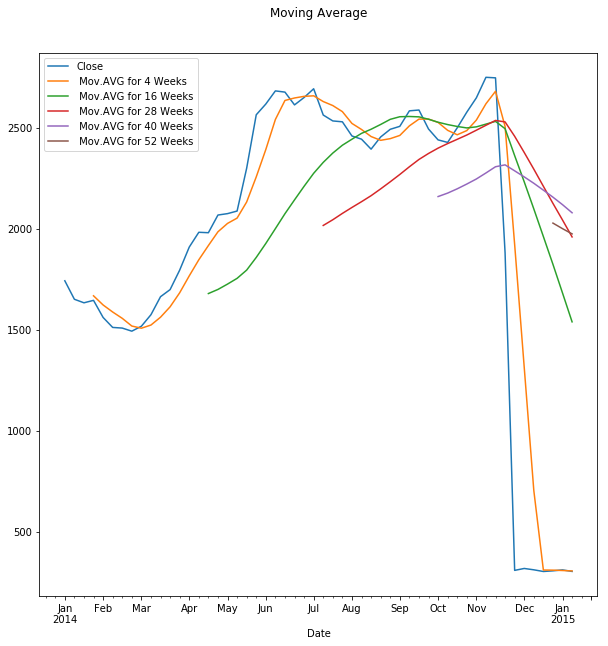

In [140]:
plot_time_series(sbin)

In [0]:
SBIN = sbin.asfreq('D', method ='pad')

SBIN.name = 'TCS'

In [0]:
def plot_roll_win(stock, win = [10, 75]):
    
    dummy = pd.DataFrame()
    
    dummy['Close'] = stock['Close']
     
    for i in range(len(win)):
        m_a = dummy['Close'].rolling(win[i]).mean() # M.A using predefined function
        dummy[" Mov.AVG for " + str(win[i])+ " Roll Window"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(win[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))
    

Calculated Moving Averages: for 10 weeks: 

 Date
2014-01-01    1765.05
2014-01-02    1742.60
2014-01-03    1719.65
2014-01-04    1719.65
2014-01-05    1719.65
2014-01-06    1688.15
2014-01-07    1661.40
2014-01-08    1657.15
2014-01-09    1639.80
2014-01-10    1608.15
2014-01-11    1608.15
2014-01-12    1608.15
2014-01-13    1641.25
2014-01-14    1627.50
2014-01-15    1640.70
2014-01-16    1636.20
2014-01-17    1621.55
2014-01-18    1621.55
2014-01-19    1621.55
2014-01-20    1641.85
2014-01-21    1659.50
2014-01-22    1646.85
2014-01-23    1658.30
2014-01-24    1621.20
2014-01-25    1621.20
2014-01-26    1621.20
2014-01-27    1594.50
2014-01-28    1596.30
2014-01-29    1573.65
2014-01-30    1516.60
               ...   
2014-12-11     314.05
2014-12-12     311.35
2014-12-13     311.35
2014-12-14     311.35
2014-12-15     310.55
2014-12-16     295.60
2014-12-17     301.75
2014-12-18     307.10
2014-12-19     304.15
2014-12-20     304.15
2014-12-21     304.15
2014-12-22     307.70
2014

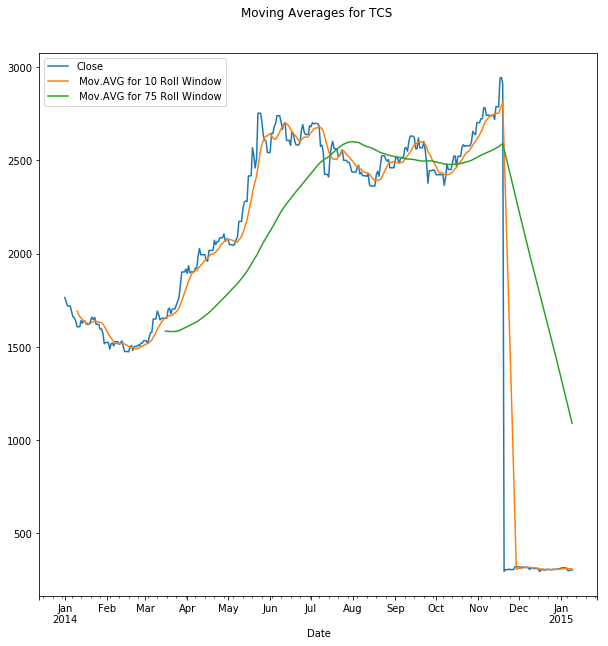

In [149]:
plot_roll_win(SBIN)

###Volume Shocks

In [0]:
def volume_shocks(stock):
    stock["vol_t+1"] = stock.Volume.shift(1)
    stock["volume_shock"] = ((abs(stock["vol_t+1"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
    return stock

In [152]:
volume_shocks(SBIN)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,SBIN,EQ,1766.50,1772.00,1774.90,1761.25,1770.00,1765.05,1767.01,...,1.043383e+14,26013,83547,0.1415,2014,1,1,1,NaN,0
2014-01-02,2014-01-02,SBIN,EQ,1765.05,1765.90,1806.00,1732.20,1736.00,1742.60,1778.15,...,3.458847e+14,84897,466573,0.2399,2014,1,2,1,590478.0,1
2014-01-03,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2.368309e+14,58063,314028,0.2282,2014,1,3,1,1945190.0,1
2014-01-04,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2.368309e+14,58063,314028,0.2282,2014,1,3,1,1375959.0,0
2014-01-05,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2.368309e+14,58063,314028,0.2282,2014,1,3,1,1375959.0,0
2014-01-06,2014-01-06,SBIN,EQ,1719.65,1721.90,1724.00,1682.00,1685.00,1688.15,1695.02,...,2.357403e+14,66356,381718,0.2745,2014,1,6,2,1375959.0,0
2014-01-07,2014-01-07,SBIN,EQ,1688.15,1692.90,1702.00,1655.00,1656.20,1661.40,1670.51,...,2.898813e+14,79314,483821,0.2788,2014,1,7,2,1390783.0,1
2014-01-08,2014-01-08,SBIN,EQ,1661.40,1664.25,1677.95,1651.00,1653.70,1657.15,1665.48,...,2.373108e+14,76537,392760,0.2756,2014,1,8,2,1735291.0,1
2014-01-09,2014-01-09,SBIN,EQ,1657.15,1653.00,1662.75,1630.00,1639.05,1639.80,1641.88,...,2.428528e+14,85642,485208,0.3280,2014,1,9,2,1424879.0,0


###Volume Shock Direction

In [0]:
def direction_fun(stock):
    if stock["volume_shock"] == 0:
        pass
    else:
        if (stock["vol_t+1"] - stock["Volume"]) < 0:
            return 0
        else:
            return 1
    
    

In [0]:
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_fun, axis=1)
    return stock

In [155]:
vol_shock_direction(SBIN)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,SBIN,EQ,1766.50,1772.00,1774.90,1761.25,1770.00,1765.05,1767.01,...,26013,83547,0.1415,2014,1,1,1,NaN,0,NaN
2014-01-02,2014-01-02,SBIN,EQ,1765.05,1765.90,1806.00,1732.20,1736.00,1742.60,1778.15,...,84897,466573,0.2399,2014,1,2,1,590478.0,1,0.0
2014-01-03,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,58063,314028,0.2282,2014,1,3,1,1945190.0,1,1.0
2014-01-04,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,58063,314028,0.2282,2014,1,3,1,1375959.0,0,NaN
2014-01-05,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,58063,314028,0.2282,2014,1,3,1,1375959.0,0,NaN
2014-01-06,2014-01-06,SBIN,EQ,1719.65,1721.90,1724.00,1682.00,1685.00,1688.15,1695.02,...,66356,381718,0.2745,2014,1,6,2,1375959.0,0,NaN
2014-01-07,2014-01-07,SBIN,EQ,1688.15,1692.90,1702.00,1655.00,1656.20,1661.40,1670.51,...,79314,483821,0.2788,2014,1,7,2,1390783.0,1,0.0
2014-01-08,2014-01-08,SBIN,EQ,1661.40,1664.25,1677.95,1651.00,1653.70,1657.15,1665.48,...,76537,392760,0.2756,2014,1,8,2,1735291.0,1,1.0
2014-01-09,2014-01-09,SBIN,EQ,1657.15,1653.00,1662.75,1630.00,1639.05,1639.80,1641.88,...,85642,485208,0.3280,2014,1,9,2,1424879.0,0,NaN


###Price Shocks

In [0]:
def price_shocks(stock):
    stock["price_t+1"] = stock.Close.shift(1)  #next rows value
    
    stock["price_shock"] = (abs((stock["price_t+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    
    stock["price_black_swan"] = stock['price_shock'] # Since both had same data anad info/
    
    return stock

In [157]:
price_shocks(SBIN)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,SBIN,EQ,1766.50,1772.00,1774.90,1761.25,1770.00,1765.05,1767.01,...,2014,1,1,1,NaN,0,NaN,NaN,0,0
2014-01-02,2014-01-02,SBIN,EQ,1765.05,1765.90,1806.00,1732.20,1736.00,1742.60,1778.15,...,2014,1,2,1,590478.0,1,0.0,1765.05,0,0
2014-01-03,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2014,1,3,1,1945190.0,1,1.0,1742.60,0,0
2014-01-04,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2014,1,3,1,1375959.0,0,NaN,1719.65,0,0
2014-01-05,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2014,1,3,1,1375959.0,0,NaN,1719.65,0,0
2014-01-06,2014-01-06,SBIN,EQ,1719.65,1721.90,1724.00,1682.00,1685.00,1688.15,1695.02,...,2014,1,6,2,1375959.0,0,NaN,1719.65,0,0
2014-01-07,2014-01-07,SBIN,EQ,1688.15,1692.90,1702.00,1655.00,1656.20,1661.40,1670.51,...,2014,1,7,2,1390783.0,1,0.0,1688.15,0,0
2014-01-08,2014-01-08,SBIN,EQ,1661.40,1664.25,1677.95,1651.00,1653.70,1657.15,1665.48,...,2014,1,8,2,1735291.0,1,1.0,1661.40,0,0
2014-01-09,2014-01-09,SBIN,EQ,1657.15,1653.00,1662.75,1630.00,1639.05,1639.80,1641.88,...,2014,1,9,2,1424879.0,0,NaN,1657.15,0,0


### Price Shock Direction and Black Swan shock direction (both same) 

In [0]:
def direction_fun_price(stock):
    if stock["price_shock"] == 0:
        pass
    else:
        if (stock["price_t+1"] - stock["Close"]) < 0:
            return 0
        else:
            return 1

In [0]:
def price_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_fun_price, axis=1)
    return stock

In [160]:
vol_shock_direction(SBIN)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,SBIN,EQ,1766.50,1772.00,1774.90,1761.25,1770.00,1765.05,1767.01,...,2014,1,1,1,NaN,0,NaN,NaN,0,0
2014-01-02,2014-01-02,SBIN,EQ,1765.05,1765.90,1806.00,1732.20,1736.00,1742.60,1778.15,...,2014,1,2,1,590478.0,1,0.0,1765.05,0,0
2014-01-03,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2014,1,3,1,1945190.0,1,1.0,1742.60,0,0
2014-01-04,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2014,1,3,1,1375959.0,0,NaN,1719.65,0,0
2014-01-05,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,2014,1,3,1,1375959.0,0,NaN,1719.65,0,0
2014-01-06,2014-01-06,SBIN,EQ,1719.65,1721.90,1724.00,1682.00,1685.00,1688.15,1695.02,...,2014,1,6,2,1375959.0,0,NaN,1719.65,0,0
2014-01-07,2014-01-07,SBIN,EQ,1688.15,1692.90,1702.00,1655.00,1656.20,1661.40,1670.51,...,2014,1,7,2,1390783.0,1,0.0,1688.15,0,0
2014-01-08,2014-01-08,SBIN,EQ,1661.40,1664.25,1677.95,1651.00,1653.70,1657.15,1665.48,...,2014,1,8,2,1735291.0,1,1.0,1661.40,0,0
2014-01-09,2014-01-09,SBIN,EQ,1657.15,1653.00,1662.75,1630.00,1639.05,1639.80,1641.88,...,2014,1,9,2,1424879.0,0,NaN,1657.15,0,0


### Price Shock w/o volume shocks

In [0]:
def price_shock_wo_vol_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["volume_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    
    return stock

In [163]:
price_shock_wo_vol_shock(SBIN)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,SBIN,EQ,1766.50,1772.00,1774.90,1761.25,1770.00,1765.05,1767.01,...,1,1,NaN,0,NaN,NaN,0,0,1,0
2014-01-02,2014-01-02,SBIN,EQ,1765.05,1765.90,1806.00,1732.20,1736.00,1742.60,1778.15,...,2,1,590478.0,1,0.0,1765.05,0,0,0,0
2014-01-03,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,3,1,1945190.0,1,1.0,1742.60,0,0,0,0
2014-01-04,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,3,1,1375959.0,0,NaN,1719.65,0,0,1,0
2014-01-05,2014-01-03,SBIN,EQ,1742.60,1727.00,1736.00,1711.00,1719.00,1719.65,1721.21,...,3,1,1375959.0,0,NaN,1719.65,0,0,1,0
2014-01-06,2014-01-06,SBIN,EQ,1719.65,1721.90,1724.00,1682.00,1685.00,1688.15,1695.02,...,6,2,1375959.0,0,NaN,1719.65,0,0,1,0
2014-01-07,2014-01-07,SBIN,EQ,1688.15,1692.90,1702.00,1655.00,1656.20,1661.40,1670.51,...,7,2,1390783.0,1,0.0,1688.15,0,0,0,0
2014-01-08,2014-01-08,SBIN,EQ,1661.40,1664.25,1677.95,1651.00,1653.70,1657.15,1665.48,...,8,2,1735291.0,1,1.0,1661.40,0,0,0,0
2014-01-09,2014-01-09,SBIN,EQ,1657.15,1653.00,1662.75,1630.00,1639.05,1639.80,1641.88,...,9,2,1424879.0,0,NaN,1657.15,0,0,1,0


###Data Visualization

In [0]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper
from bokeh.palettes import Spectral11

In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline

In [165]:
output_notebook()

Loading BokehJS ...

In [0]:
def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    
    p = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock.name), x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend='price shock without vol shock')
    show(p)

In [168]:
output_file("timeseries.html")
bokeh_plot(SBIN)

In [169]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(stock.name))

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [170]:
output_file("PACF.html")
draw_pacf(SBIN)